1. Problem statement (Business problem understanding)
    - Find student's performance based on different parameters like Gender, Ethinicity,Parental level of education, Lunch, test preparation,etc.

2. Data collection 
    - Dataset consists of 1000 rows and 8 columns

2.1 Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("student.csv")

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

3. Data Understanding
    - check for missing value
    - check for duplicates
    - check the datatype
    - check the unique values
    - basic descriptive statistics of the data
    - Categories present in categorical columns

In [5]:
#3.1 Check for missing values

df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
#3.2 check for duplicates
df.duplicated().sum()

0

In [7]:
#3.3 check for datatype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
#3.4 check for number of unique values in each variable

df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
#3.5 Basic descriptive statistics of data
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
for i in list(df.keys()):
    print("Categories in "+i+" variable are :",end ="    ")
    print(df[i].unique())

Categories in gender variable are :    ['female' 'male']
Categories in race_ethnicity variable are :    ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education variable are :    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable are :    ['standard' 'free/reduced']
Categories in test_preparation_course variable are :    ['none' 'completed']
Categories in math_score variable are :    [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
Categories in reading_score variable are :    [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  8

In [11]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != "O"]
categorical_features = [feature for feature in df.columns if df[feature].dtype =="O"]

print("Number of numerical features = {} & they are: {}".format(len(numerical_features),numerical_features))
print("Number of categorical features = {} & they are: {}".format(len(categorical_features),categorical_features))

Number of numerical features = 3 & they are: ['math_score', 'reading_score', 'writing_score']
Number of categorical features = 5 & they are: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [12]:
df["Total_Score"] = df["math_score"] + df["reading_score"] + df["writing_score"]
df["Average_score"] = df["Total_Score"]/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
Reading_full = df[df["reading_score"] == 100]["Average_score"].count()
Maths_full = df[df["math_score"] == 100]["Average_score"].count()
Writing_full = df[df["writing_score"] == 100]["Average_score"].count()

print("Students with full marks in Maths:", Maths_full)
print("Students with full marks in reading:", Reading_full)
print("Students with full marks in writing:", Writing_full)

Students with full marks in Maths: 7
Students with full marks in reading: 17
Students with full marks in writing: 14


In [14]:
Reading_less = df[df["reading_score"] <= 20]["Average_score"].count()
Maths_less= df[df["math_score"] <= 20]["Average_score"].count()
Writing_less = df[df["writing_score"] <= 20]["Average_score"].count()

print("Students with full marks in Maths:", Maths_less)
print("Students with full marks in reading:", Reading_less)
print("Students with full marks in writing:", Writing_less)

Students with full marks in Maths: 4
Students with full marks in reading: 1
Students with full marks in writing: 3


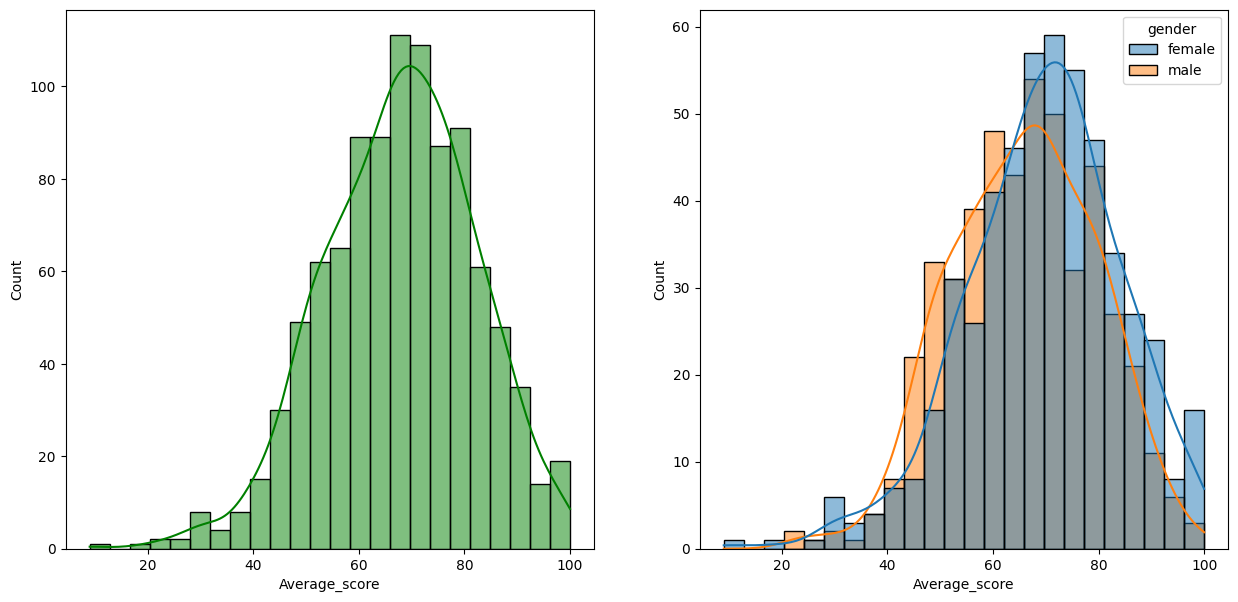

In [15]:
fig, axs = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(df["Average_score"],kde = True,color = "g")
plt.subplot(122)
sns.histplot(x = df["Average_score"],kde = True,hue = df["gender"])
plt.show()

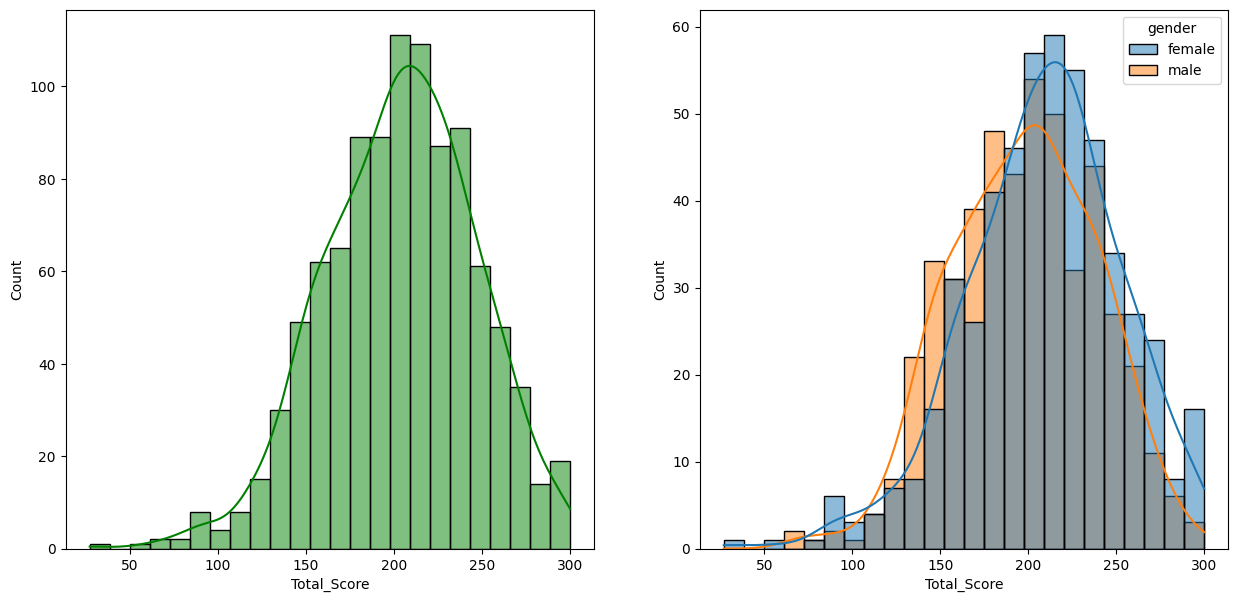

In [16]:
fig, axs = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(df["Total_Score"],kde = True,color = "g")
plt.subplot(122)
sns.histplot(x = df["Total_Score"],kde = True,hue = df["gender"])
plt.show()

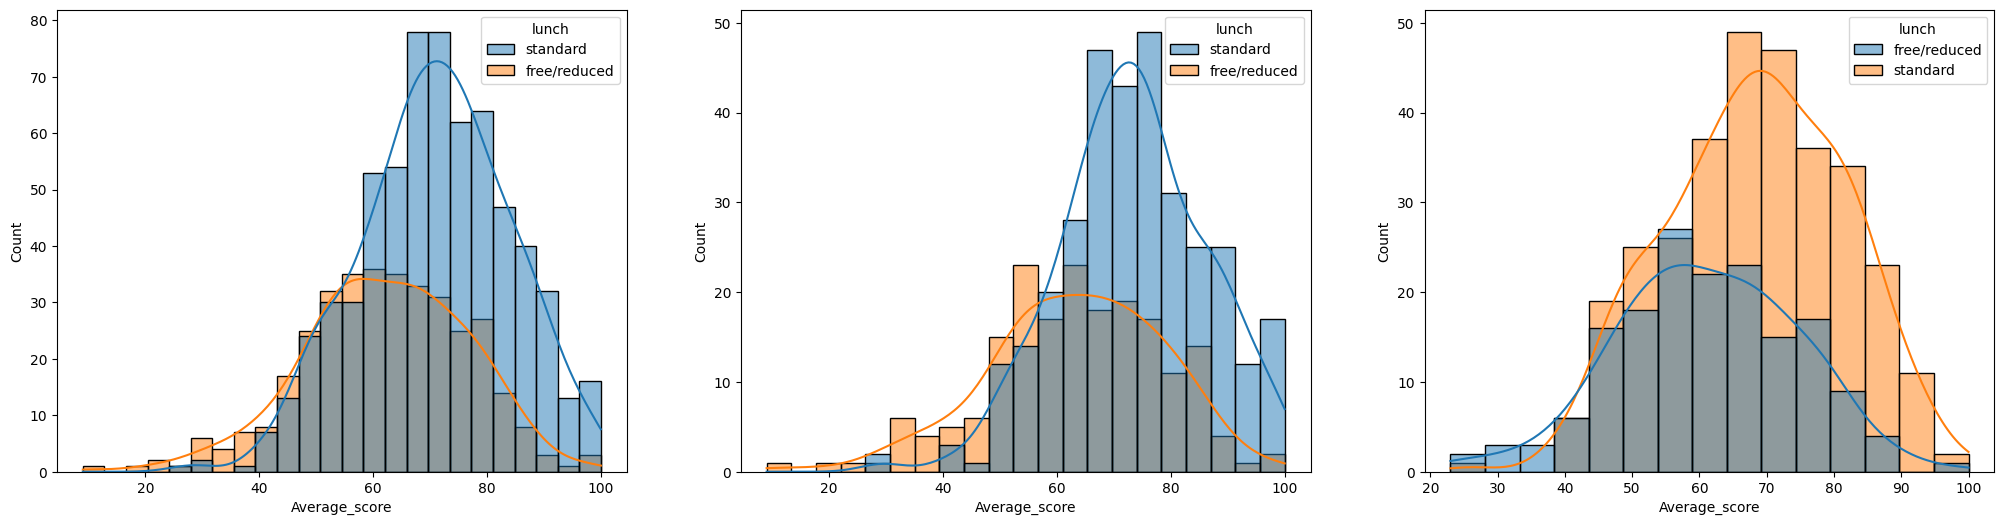

In [24]:
plt.subplots(1,3,figsize = (25,6))
plt.subplot(1,3,1)
sns.histplot(data = df,x = "Average_score",kde = True,hue = "lunch")
plt.subplot(1,3,2)
sns.histplot(data = df[df.gender == "female"],x = "Average_score",kde = True,hue = "lunch")
plt.subplot(1,3,3)
sns.histplot(data = df[df.gender=="male"],x = "Average_score",kde = True, hue = "lunch")
plt.show()

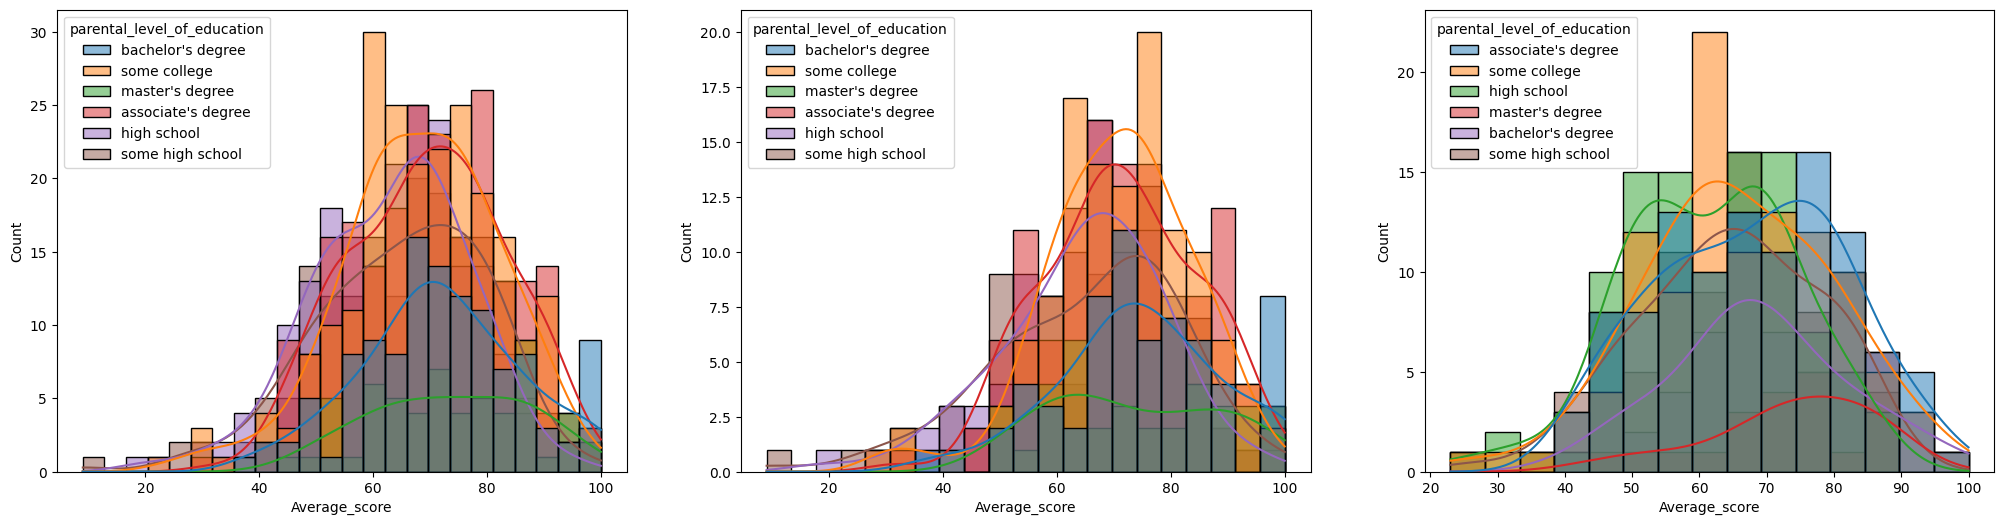

In [30]:
plt.subplots(1,3,figsize = (25,6))
plt.subplot(1,3,1)
sns.histplot(data = df, x = "Average_score",kde = True,hue = "parental_level_of_education")
plt.subplot(1,3,2)
sns.histplot(data = df[df.gender == "female"],x = "Average_score",kde = True, hue = "parental_level_of_education")
plt.subplot(1,3,3)
sns.histplot(data = df[df.gender == "male"],x = "Average_score",kde = True, hue = "parental_level_of_education")
plt.show()

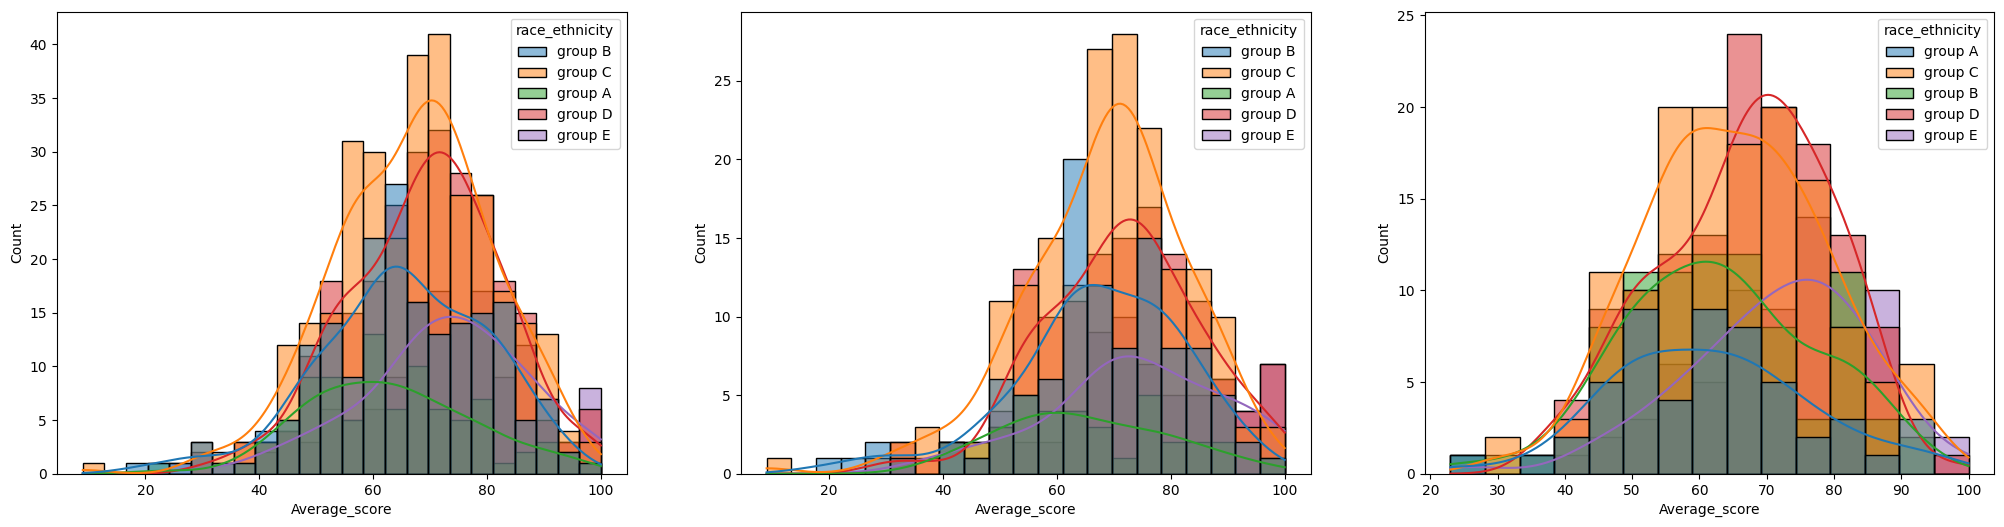

In [36]:
plt.subplots(1,3,figsize = (25,6))
plt.subplot(1,3,1)
sns.histplot(data = df, x = "Average_score", kde = True,hue = "race_ethnicity")
plt.subplot(1,3,2)
sns.histplot(data = df[df.gender == "female"],x = "Average_score",kde = True, hue = "race_ethnicity")
plt.subplot(1,3,3)
sns.histplot(data = df[df.gender == "male"],x = "Average_score",kde = True, hue = "race_ethnicity")
plt.show()


plt.show()

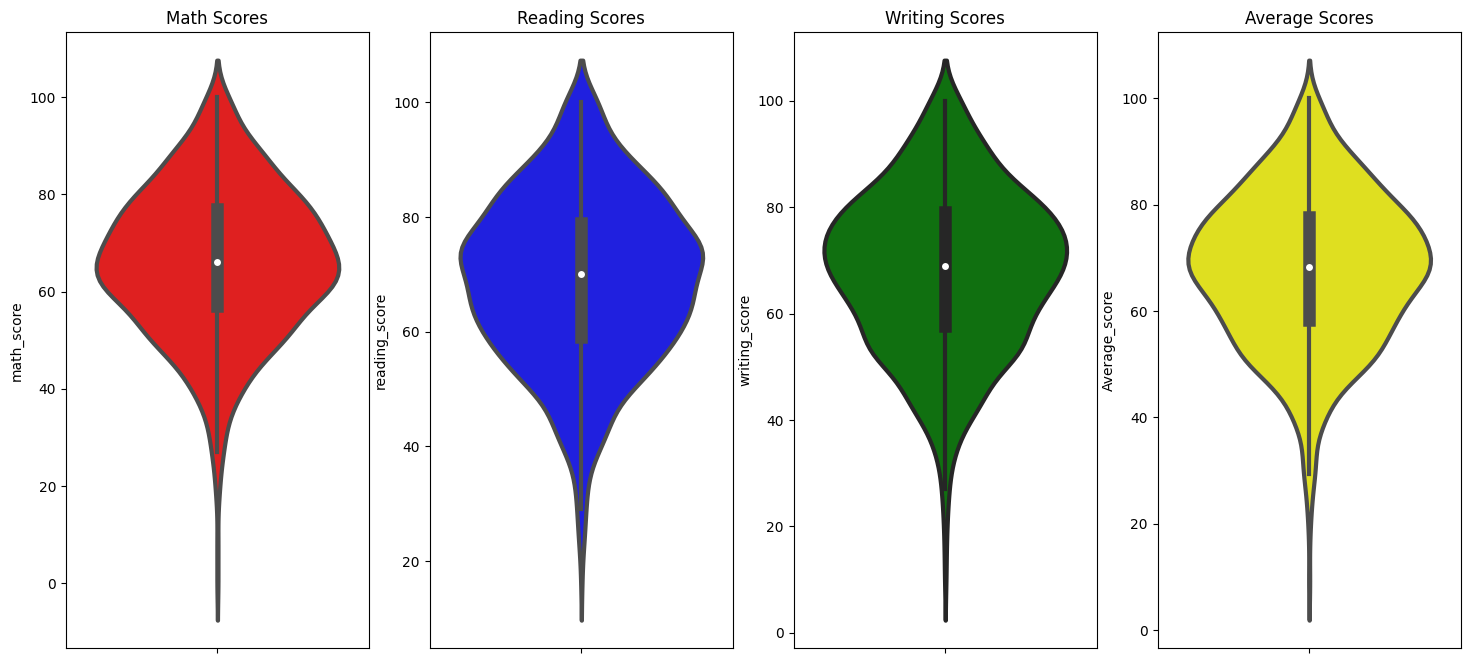

In [45]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title("Math Scores")
sns.violinplot(y = "math_score",data = df,color = "red",linewidth=3)
plt.subplot(1,4,2)
plt.title("Reading Scores")
sns.violinplot(y = "reading_score",data = df,color = "blue",linewidth = 3)
plt.subplot(1,4,3)
plt.title("Writing Scores")
sns.violinplot(y ="writing_score",data = df,color = "green",linewidth=3 )
plt.subplot(1,4,4)
plt.title("Average Scores")
sns.violinplot(y = "Average_score",data = df,color = "yellow",linewidth=3)
plt.show()

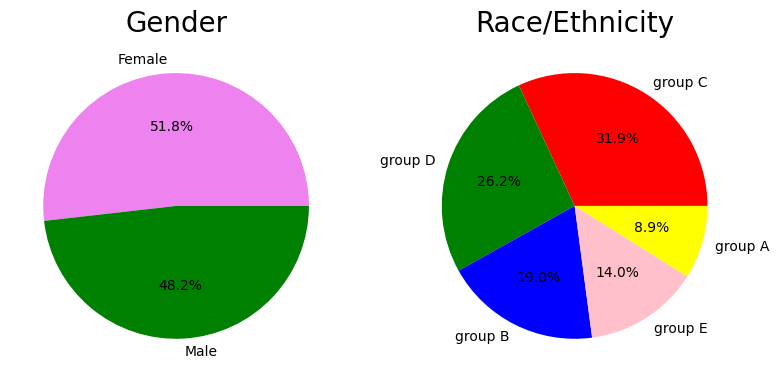

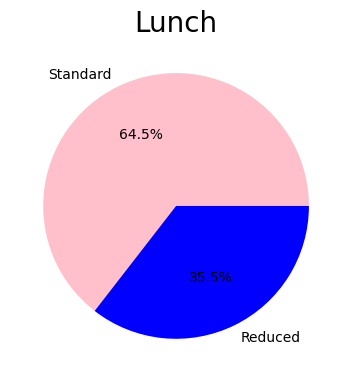

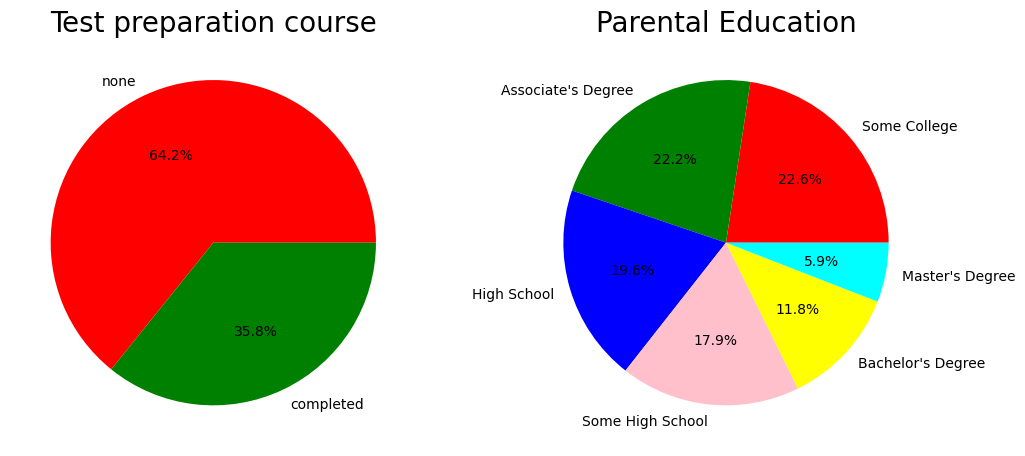

In [85]:
plt.rcParams["figure.figsize"] = (30,12)

plt.subplot(1,6,1)
size = df["gender"].value_counts()
labels = "Female","Male"
color = ["violet","green"]

plt.pie(size,colors = color,labels = labels,autopct = "%0.1f%%")
plt.title("Gender",fontsize = 20)
plt.axis("off")

plt.subplot(1,6,2)
size = df["race_ethnicity"].value_counts()
labels = "group C","group D","group B","group E","group A"
color = ["red","green","blue","pink","yellow"]

plt.pie(size,colors = color,labels = labels,autopct = "%0.1f%%")
plt.title("Race/Ethnicity",fontsize = 20)
plt.axis("off")
plt.show()

plt.subplot(1,6,3)
size = df["lunch"].value_counts()
labels = "Standard","Reduced"
color = ["pink","blue"]

plt.pie(size,colors = color,labels = labels,autopct = "%0.1f%%")
plt.title("Lunch",fontsize = 20)
plt.axis("off")
plt.show()

plt.subplot(1,6,4)
size = df["test_preparation_course"].value_counts()
labels = 'none', 'completed'
color = ["red","green"]

plt.pie(size,colors = color,labels = labels,autopct = "%0.1f%%")
plt.title("Test preparation course",fontsize = 20)
plt.axis("off")

plt.subplot(1,6,5)
size = df["parental_level_of_education"].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ["red","green","blue","pink","yellow","cyan"]

plt.pie(size,colors = color,labels = labels,autopct = "%0.1f%%")
plt.title("Parental Education",fontsize = 20)
plt.axis("off")

plt.tight_layout()
plt.grid()
plt.show()


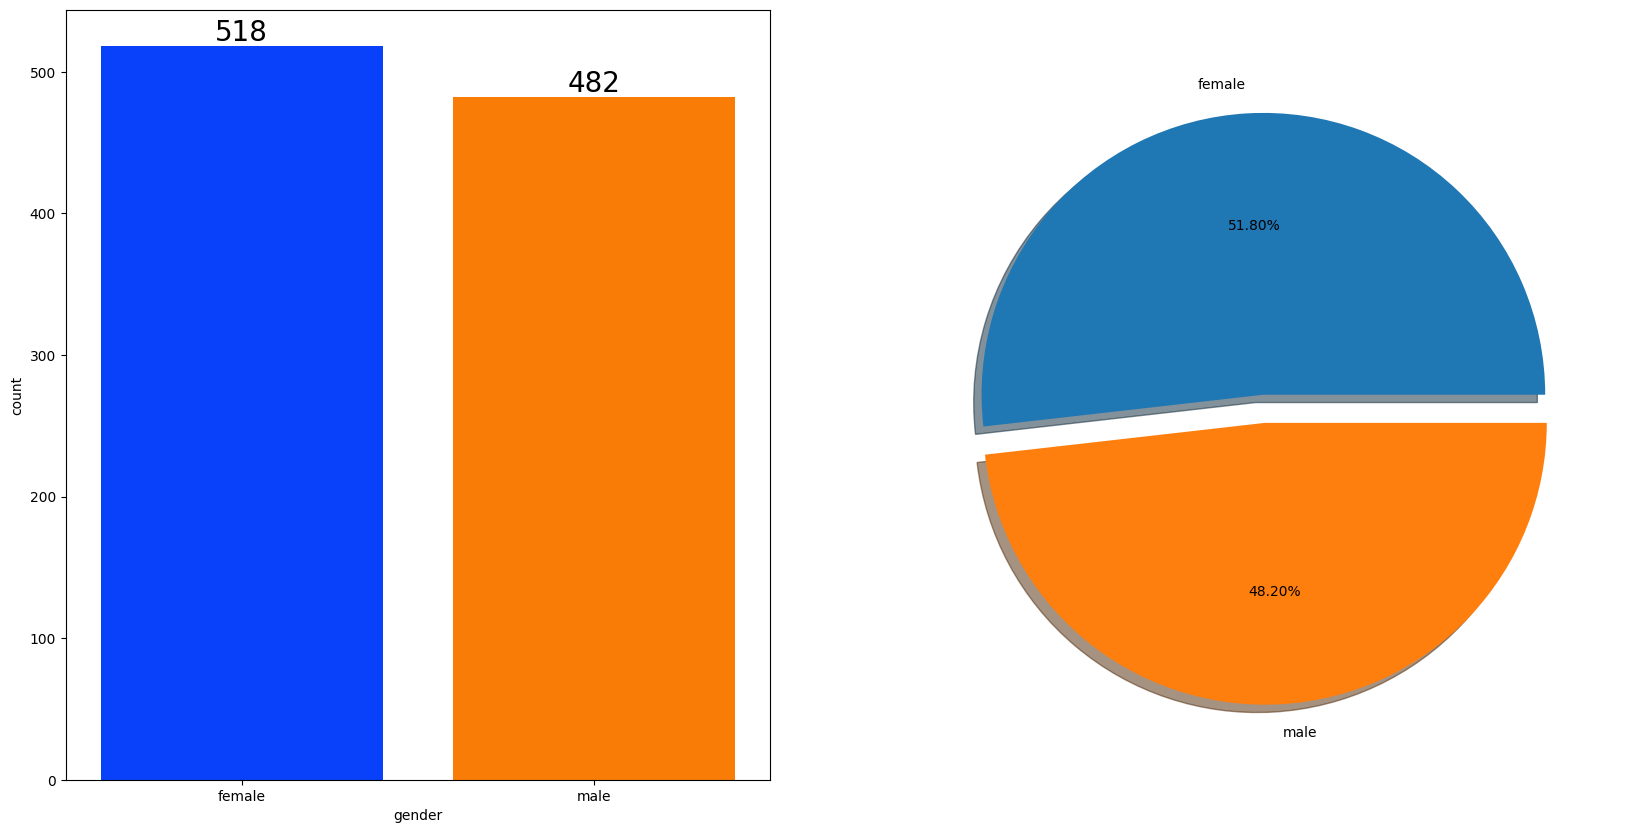

In [106]:
f,ax = plt.subplots(1,2,figsize = (20,10))
sns.countplot(x = df["gender"],palette="bright",ax = ax[0],saturation = 0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color = "black",size = 20)

plt.pie(x = df["gender"].value_counts(),labels = ["female","male"],explode = [0,0.1],shadow = True,autopct = "%0.2f%%")
plt.show()

In [111]:
gender_performance = df.groupby("gender")["Average_score"].mean()
gender_performance

gender
female    69.569498
male      65.837483
Name: Average_score, dtype: float64

In [ ]:
plt.figure(figsize = (10,8))

X = ["Total Average","Math Average"]

female_score = [gender_performance["Average_score"][0]]

In [113]:
gender_performance["Average_score"][0]

KeyError: 'Average_score'

In [115]:
df.groupby("gender").mean()

TypeError: Could not convert group Bgroup Cgroup Bgroup Bgroup Bgroup Bgroup Bgroup Agroup Cgroup Bgroup Cgroup Bgroup Cgroup Cgroup Dgroup Dgroup Bgroup Egroup Dgroup Dgroup Dgroup Cgroup Bgroup Egroup Agroup Cgroup Dgroup Cgroup Cgroup Egroup Cgroup Cgroup Dgroup Cgroup Cgroup Dgroup Agroup Dgroup Egroup Bgroup Cgroup Cgroup Dgroup Agroup Dgroup Cgroup Bgroup Egroup Dgroup Dgroup Dgroup Cgroup Dgroup Bgroup Bgroup Dgroup Dgroup Egroup Bgroup Dgroup Dgroup Cgroup Cgroup Cgroup Bgroup Agroup Cgroup Cgroup Dgroup Cgroup Egroup Cgroup Dgroup Bgroup Cgroup Egroup Bgroup Egroup Egroup Cgroup Bgroup Bgroup Cgroup Dgroup Cgroup Cgroup Cgroup Bgroup Cgroup Bgroup Dgroup Cgroup Egroup Dgroup Cgroup Egroup Bgroup Cgroup Bgroup Bgroup Cgroup Dgroup Bgroup Bgroup Bgroup Cgroup Egroup Cgroup Dgroup Cgroup Bgroup Egroup Cgroup Cgroup Bgroup Dgroup Egroup Dgroup Bgroup Bgroup Dgroup Bgroup Egroup Cgroup Bgroup Cgroup Cgroup Cgroup Egroup Cgroup Dgroup Dgroup Egroup Dgroup Dgroup Cgroup Egroup Cgroup Dgroup Dgroup Bgroup Bgroup Egroup Cgroup Cgroup Bgroup Dgroup Bgroup Cgroup Cgroup Dgroup Dgroup Cgroup Egroup Cgroup Cgroup Cgroup Cgroup Bgroup Cgroup Bgroup Bgroup Dgroup Cgroup Bgroup Cgroup Cgroup Bgroup Cgroup Cgroup Cgroup Bgroup Cgroup Dgroup Bgroup Cgroup Dgroup Agroup Dgroup Cgroup Dgroup Dgroup Dgroup Dgroup Agroup Bgroup Egroup Agroup Egroup Egroup Cgroup Dgroup Dgroup Cgroup Bgroup Cgroup Cgroup Agroup Dgroup Cgroup Cgroup Bgroup Dgroup Dgroup Cgroup Cgroup Dgroup Dgroup Agroup Cgroup Cgroup Agroup Cgroup Dgroup Agroup Bgroup Cgroup Cgroup Egroup Cgroup Cgroup Dgroup Egroup Egroup Cgroup Cgroup Dgroup Agroup Cgroup Cgroup Cgroup Dgroup Bgroup Dgroup Dgroup Dgroup Bgroup Cgroup Agroup Cgroup Cgroup Cgroup Bgroup Cgroup Dgroup Bgroup Dgroup Bgroup Egroup Dgroup Bgroup Cgroup Bgroup Bgroup Cgroup Dgroup Egroup Dgroup Bgroup Cgroup Cgroup Dgroup Cgroup Cgroup Cgroup Egroup Cgroup Dgroup Cgroup Dgroup Dgroup Agroup Cgroup Bgroup Cgroup Cgroup Bgroup Dgroup Cgroup Dgroup Egroup Dgroup Cgroup Cgroup Egroup Bgroup Bgroup Dgroup Dgroup Egroup Dgroup Dgroup Dgroup Cgroup Agroup Cgroup Cgroup Agroup Egroup Cgroup Cgroup Dgroup Dgroup Dgroup Cgroup Egroup Cgroup Cgroup Egroup Bgroup Cgroup Cgroup Agroup Cgroup Egroup Cgroup Egroup Cgroup Bgroup Cgroup Bgroup Dgroup Dgroup Dgroup Bgroup Egroup Bgroup Dgroup Egroup Bgroup Dgroup Agroup Dgroup Agroup Bgroup Bgroup Dgroup Dgroup Cgroup Cgroup Cgroup Bgroup Cgroup Cgroup Cgroup Dgroup Bgroup Egroup Cgroup Dgroup Cgroup Egroup Cgroup Egroup Cgroup Dgroup Cgroup Dgroup Cgroup Agroup Dgroup Egroup Bgroup Dgroup Bgroup Dgroup Egroup Dgroup Bgroup Bgroup Cgroup Cgroup Cgroup Bgroup Egroup Dgroup Bgroup Cgroup Egroup Bgroup Agroup Cgroup Cgroup Cgroup Cgroup Egroup Dgroup Cgroup Dgroup Bgroup Bgroup Cgroup Dgroup Bgroup Cgroup Bgroup Bgroup Cgroup Agroup Dgroup Bgroup Bgroup Cgroup Bgroup Egroup Bgroup Cgroup Bgroup Dgroup Bgroup Egroup Egroup Cgroup Egroup Bgroup Cgroup Dgroup Egroup Cgroup Cgroup Agroup Bgroup Cgroup Agroup Dgroup Bgroup Cgroup Cgroup Cgroup Dgroup Agroup Cgroup Bgroup Cgroup Agroup Cgroup Dgroup Bgroup Dgroup Cgroup Agroup Egroup Bgroup Cgroup Cgroup Egroup Cgroup Cgroup Cgroup Dgroup Dgroup Egroup Bgroup Egroup Cgroup Egroup Dgroup Egroup Egroup Agroup Egroup Egroup Bgroup Dgroup Cgroup Agroup Dgroup Dgroup Dgroup Cgroup Agroup Cgroup Cgroup Bgroup Egroup Cgroup Cgroup Cgroup Bgroup Dgroup Cgroup Egroup Dgroup Bgroup Cgroup Dgroup Egroup Dgroup Egroup Cgroup Dgroup Dgroup Agroup Dgroup Egroup Cgroup Dgroup Egroup Bgroup Dgroup Agroup Dgroup Agroup Cgroup Cgroup Bgroup Agroup Cgroup Cgroup Agroup Dgroup Bgroup Dgroup Dgroup Egroup Cgroup Dgroup D to numeric